# CNN 실습 - MNIST DATA로
#### 모두의 딥러닝 개정 2판 참고

## 데이터 전처리

In [1]:
from keras.datasets import mnist

In [33]:
import numpy
import tensorflow as tf

seed 값을 설정함.

In [34]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

kreas datasets에서 mnist 데이터를 불러온 후 확인함.

- 학습에 사용될 부분: X_train, Y_class_train
- 테스트에 사용될 부분: X_test, Y_class_test

In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("학습 셋 이미지 수: %d 개"%(X_train.shape[0]))
print("테스트 셋 이미지 수: %d 개"%(X_test.shape[0]))

학습 셋 이미지 수: 60000 개
테스트 셋 이미지 수: 10000 개


불러온 이미지 중 한 개를 확인.

- X_train[10]: 학습 데이터 세트 이미지의 10 번째 이미지를 출력하게 함
- cmap = 'Greys' 옵션 이용하여 흑백으로 출력하게 함

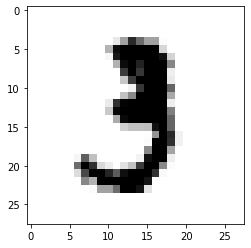

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap='Greys')
plt.show()

컴퓨터가 이 이미지를 인식하는 방법 확인.

- 각 픽셀은 0 ~ 255로 수치화되어 인식됨. 흰색 배경은 0, 글씨가 들어간 곳은 흑백 정도에 따라 0 ~ 255까지 등급으로 확인됨.

In [16]:
import sys

for x in X_train[10]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	42	118	219	166	118	118	6	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	103	242	254	254	254	254	254	66	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	18	232	254	254	254	254	254	238	70	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	104	244	254	224	254	254	254	141	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	207	254	210	254	254	254	34	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	84	206	254	254	254	254	41	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	24	209	254	254	254	171	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	91	137	253	254	254	254	112	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	40	214	250	254	254	254	254	254	34	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	81	247	254	254	254	254	254	254	146	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	110	246	254	254	254	254	254	171	0	0	0	0	

이미지(속성을 담은 데이터)

-> 숫자의 집합(학습 셋)

-> 클래스 예측

#### 2차원 배열을 1차원 배열로 변환
 - (28, 28)의 2차원 배열이므로 28 * 28 == 784의 1차원 배열으로 변환해 주어야 함
 - shape 함수 사용

In [17]:
X_train = X_train.reshape(X_train.shape[0], 784)

### 데이터 정규화(normalization)
- 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정

#### 데이터를 0 ~ 1 사이의 값으로 변환 
- keras는 데이터가 0에서 1사이의 값일 때 최적의 성능
- 현재 데이터: 0 ~ 225 --> 바꿀 데이터: 0 ~ 1
- 현재 데이터를 모두 225로 나눔
- 데이터를 나누기 위해 정수형 데이터값을 실수형으로 변환 - astype() 함수 이용

In [20]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [21]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

숫자 이미지에 매겨진 이름 확인

In [24]:
print("class : %d" % (Y_class_train[10]))

class : 3


### 원 핫 인코딩
- 딥러닝 분류 문제에서는 원 핫 인코딩 방식 적용해야 함
- 현재: 정수형 값 -> 바꿀 값: 0/1로만 이루어진 벡터값
- 이 문제에서는 np_utils.to.categorical() 함수 이용

#### 바이너리화

In [30]:
from keras import utils as np_utils

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [31]:
print(Y_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## 딥러닝 기본 프레임 제작

입력 값 input_dim: 784개
은닉층 hidden layer: 512 개
출력 output: 10개

- 활성화 함수 (은닉층): relu function
- 최적화 함수: adam function
- 오차 함수: categorical_Crossentropy function
- 최적화 함수: adam

In [40]:
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(512, input_dim=784, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

10회 이상 모델 성과 향상 없으면 자동 학습 중단

In [46]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

샘플 200개를 모두 40번 실행하게 설정

테스트셋으로 최종 모델의 성과 측정 -> 값 출력

In [47]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./model\02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08899, saving model to ./model\03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08899 to 0.07861, saving model to ./model\04-0.0786.hdf5

Epoch 00005: val_loss improved from 0.07861 to 0.07415, saving model to ./model\05-0.0742.hdf5

Epoch 00006: val_loss improved from 0.07415 to 0.06754, saving model to ./model\06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06754 to 0.06505, saving model to ./model\07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06505 to 0.06265, saving model to ./model\08-0.0627.hdf5

Epoch 00009: val_loss did not improve from 0.06265

Epoch 00010: val_loss did not improve from 0.06265

Epoch 00011: val_loss did not improve from 0.06265

Epoch 00012: val_loss did not improve from 0.06265

Epoch 00013: val_loss impro

학습 셋의 오차(1 - 정확도) 그래프 표현

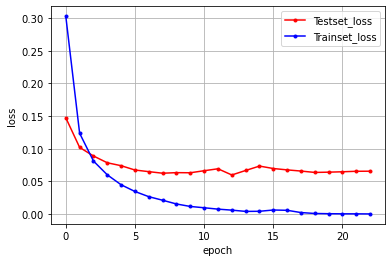

In [48]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Convolutional Neural Network, CNN 이용

### 컨볼루션 층 적용
- keras에서 convolution 층 추가하는 함수: Conv2D()
- 위 딥러닝 기본 셋 적용 부분을 컨볼루션 층으로 만들어 보자

In [64]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import activations

model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation= 'relu'))

컨볼루션 층 하나 더 추가~

In [66]:
model.add(Conv2D(64, (3, 3), activation='relu'))

### 풀링pooling (서브 샘플링sub sampling)
- 컨볼루션 층을 통해 도출한 이미지 특징이 크고 복잡하면 다시 한번 축소하는 과정 거침
- 이 과정을 풀링*plooing* 혹은 서브 샘플링*sub sampling* 이라고 함

#### 맥스 풀링max pooling
- 정해진 구역 안에서 최댓값을 뽑아냄

#### 평균 풀링average pooling
- 평균값을 뽑아냄

In [68]:
from keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=2))

pool_size는 풀링 창의 크기를 정하는 것.

2로 정하면 전체 크기가 절반(1/2)로 줄어든다.

### 드롭아웃drop out
- 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 것이 아님. - 과적합
- 은닉층에 배치된 노드 중 일부를 임의로 꺼 줌
- 과적합 방지에 효과적

25%의 노드를 끄려면 다음과 같이 코드 작성

In [71]:
from keras.layers import Dropout

model.add(Dropout(0.25))

컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다루기 때문에 1차원 배열로 바꾸어야 함.

Flatten() 함수는 2차원 배열을 1차원으로 바꿔 줌.

In [72]:
from keras.layers import Flatten

model.add(Flatten())

## 실행

다음 실행은 전 코드와 같다.

In [80]:
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [83]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [84]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.16437, saving model to ./model\01-0.1644.hdf5

Epoch 00002: val_loss improved from 0.16437 to 0.09633, saving model to ./model\02-0.0963.hdf5

Epoch 00003: val_loss improved from 0.09633 to 0.07730, saving model to ./model\03-0.0773.hdf5

Epoch 00004: val_loss improved from 0.07730 to 0.05812, saving model to ./model\04-0.0581.hdf5

Epoch 00005: val_loss improved from 0.05812 to 0.05674, saving model to ./model\05-0.0567.hdf5

Epoch 00006: val_loss did not improve from 0.05674

Epoch 00007: val_loss improved from 0.05674 to 0.04445, saving model to ./model\07-0.0444.hdf5

Epoch 00008: val_loss did not improve from 0.04445

Epoch 00009: val_loss improved from 0.04445 to 0.03985, saving model to ./model\09-0.0399.hdf5

Epoch 00010: val_loss did not improve from 0.03985

Epoch 00011: val_loss improved from 0.03985 to 0.03883, saving model to ./model\11-0.0388.hdf5

Epoch 00012: val_loss improved from 0.03883 to 0.03341, saving model to ./model

In [87]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.0309 - accuracy: 0.9935 0s - loss:

 Test Accuracy: 0.9935


In [88]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

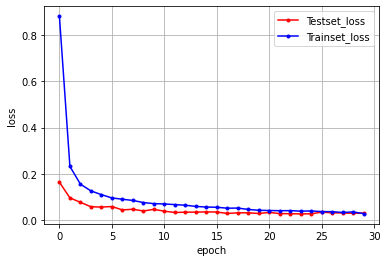

In [92]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()